# Importing libraries and required files

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as offline
import itertools
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
import matplotlib
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller

offline.init_notebook_mode()
xls=pd.ExcelFile("PET_PRI_SPT_S1_M.xls")
df_crudeOil=pd.read_excel(xls,"Data 1")
df_cGasoline=pd.read_excel(xls,"Data 2")
df_rGasoline=pd.read_excel(xls,"Data 3")
df_heatOil=pd.read_excel(xls,"Data 4")
df_diesel=pd.read_excel(xls,"Data 5")
df_jet=pd.read_excel(xls,"Data 6")
df_prop=pd.read_excel(xls,"Data 7")

# Cleaning Datasets


In [2]:
def cleanData(data):
    data.columns=data.iloc[1,:]
    data=data.iloc[2:,:]
    return data

In [3]:
#Crude Oil Dataset
df_crudeOil=cleanData(df_crudeOil)
df_crudeOil.head()

1                 Date Cushing, OK WTI Spot Price FOB (Dollars per Barrel)  \
2  1986-01-15 00:00:00                                              22.93    
3  1986-02-15 00:00:00                                              15.46    
4  1986-03-15 00:00:00                                              12.61    
5  1986-04-15 00:00:00                                              12.84    
6  1986-05-15 00:00:00                                              15.38    

1 Europe Brent Spot Price FOB (Dollars per Barrel)  
2                                              NaN  
3                                              NaN  
4                                              NaN  
5                                              NaN  
6                                              NaN

In [4]:
#C Gasoline Dataset
df_cGasoline=cleanData(df_cGasoline)
df_cGasoline.head()

1                 Date  \
2  1986-06-15 00:00:00   
3  1986-07-15 00:00:00   
4  1986-08-15 00:00:00   
5  1986-09-15 00:00:00   
6  1986-10-15 00:00:00   

1 New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
2                                               0.42                                  
3                                               0.34                                  
4                                              0.426                                  
5                                               0.42                                  
6                                               0.41                                  

1 U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  
2                                              0.409                                 
3                                              0.334                                 
4                                              0.416                                 
5                                              0.398                                 
6                                                0.4

In [5]:
#R Gasoline Dataset
df_rGasoline=cleanData(df_rGasoline)
df_rGasoline.head()

1                 Date  \
2  2003-06-15 00:00:00   
3  2003-07-15 00:00:00   
4  2003-08-15 00:00:00   
5  2003-09-15 00:00:00   
6  2003-10-15 00:00:00   

1 Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)  
2                                              1.072                              
3                                              0.965                              
4                                              1.315                              
5                                              0.949                              
6                                              0.996

In [6]:
#Heat Oil Dataset
df_heatOil=cleanData(df_heatOil)
df_heatOil.head()

1                 Date  \
2  1986-06-15 00:00:00   
3  1986-07-15 00:00:00   
4  1986-08-15 00:00:00   
5  1986-09-15 00:00:00   
6  1986-10-15 00:00:00   

1 New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)  
2                                               0.38                     
3                                              0.334                     
4                                              0.408                     
5                                              0.402                     
6                                              0.394

In [7]:
#Diesel Dataset
df_diesel=cleanData(df_diesel)
df_diesel.head()

1                 Date  \
2  1996-04-15 00:00:00   
3  1996-05-15 00:00:00   
4  1996-06-15 00:00:00   
5  1996-07-15 00:00:00   
6  1996-08-15 00:00:00   

1 New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             
5                                                NaN                             
6                                                NaN                             

1 U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             
5                                                NaN                             
6                                                NaN                             

1 Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)  
2                                               0.95                            
3                                               0.87                            
4                                              0.745                            
5                                              0.692                            
6                                              0.705

In [8]:
#Jet Fuel Dataset
df_jet=cleanData(df_jet)
df_jet.head()


1                 Date  \
2  1990-04-15 00:00:00   
3  1990-05-15 00:00:00   
4  1990-06-15 00:00:00   
5  1990-07-15 00:00:00   
6  1990-08-15 00:00:00   

1 U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)  
2                                               0.54                          
3                                              0.515                          
4                                              0.494                          
5                                              0.535                          
6                                              0.791

In [9]:
#Propane Dataset
df_prop=cleanData(df_prop)
df_prop.head()

1                 Date  \
2  1992-06-15 00:00:00   
3  1992-07-15 00:00:00   
4  1992-08-15 00:00:00   
5  1992-09-15 00:00:00   
6  1992-10-15 00:00:00   

1 Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)  
2                                              0.344            
3                                              0.342            
4                                              0.354            
5                                              0.375            
6                                              0.354

# Creating column in each dataset givem to find price changes month over month

In [10]:
#Crude Oil
df_crudeOil['Cushing, OK WTI Monthly Change']=df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].pct_change()*100
df_crudeOil['Europe Brent Monthly Change']=df_crudeOil['Europe Brent Spot Price FOB (Dollars per Barrel)'].pct_change()*100
df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']=df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].astype('float')
df_crudeOil['Europe Brent Spot Price FOB (Dollars per Barrel)']=df_crudeOil['Europe Brent Spot Price FOB (Dollars per Barrel)'].astype('float')
df_crudeOil.Date = pd.to_datetime(df_crudeOil.Date)
df_crudeOil.set_index('Date', inplace=True)
df_crudeOil


1           Cushing, OK WTI Spot Price FOB (Dollars per Barrel)  \
Date                                                              
1986-01-15                                              22.93     
1986-02-15                                              15.46     
1986-03-15                                              12.61     
1986-04-15                                              12.84     
1986-05-15                                              15.38     
1986-06-15                                              13.43     
1986-07-15                                              11.59     
1986-08-15                                              15.10     
1986-09-15                                              14.87     
1986-10-15                                              14.90     
1986-11-15                                              15.22     
1986-12-15                                              16.11     
1987-01-15                                              18.65     
1987-02-15                                              17.75     
1987-03-15                                              18.30     
1987-04-15                                              18.68     
1987-05-15                                              19.44     
1987-06-15                                              20.07     
1987-07-15                                              21.34     
1987-08-15                                              20.31     
1987-09-15                                              19.53     
1987-10-15                                              19.86     
1987-11-15                                              18.85     
1987-12-15                                              17.28     
1988-01-15                                              17.13     
1988-02-15                                              16.80     
1988-03-15                                              16.20     
1988-04-15                                              17.86     
1988-05-15                                              17.42     
1988-06-15                                              16.53     
...                                                       ...     
2016-08-15                                              44.72     
2016-09-15                                              45.18     
2016-10-15                                              49.78     
2016-11-15                                              45.66     
2016-12-15                                              51.97     
2017-01-15                                              52.50     
2017-02-15                                              53.47     
2017-03-15                                              49.33     
2017-04-15                                              51.06     
2017-05-15                                              48.48     
2017-06-15                                              45.18     
2017-07-15                                              46.63     
2017-08-15                                              48.04     
2017-09-15                                              49.82     
2017-10-15                                              51.58     
2017-11-15                                              56.64     
2017-12-15                                              57.88     
2018-01-15                                              63.70     
2018-02-15                                              62.23     
2018-03-15                                              62.73     
2018-04-15                                              66.25     
2018-05-15                                              69.98     
2018-06-15                                              67.87     
2018-07-15                                              70.98     
2018-08-15                                              68.06     
2018-09-15                                              70.23     
2018-10-15                                     

In [11]:
#Converntional Gasoline
df_cGasoline['New York Harbor Conventional Gasoline Monthly Change']=df_cGasoline['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'].pct_change()*100
df_cGasoline['U.S. Gulf Coast Conventional Gasoline Monthly Change']=df_cGasoline['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'].pct_change()*100
df_cGasoline['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)']=df_cGasoline['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'].astype('float')
df_cGasoline['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)']=df_cGasoline['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'].astype('float')
df_cGasoline.Date = pd.to_datetime(df_cGasoline.Date)
df_cGasoline.set_index('Date', inplace=True)
df_cGasoline

1           New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
Date                                                                                            
1986-06-15                                              0.420                                   
1986-07-15                                              0.340                                   
1986-08-15                                              0.426                                   
1986-09-15                                              0.420                                   
1986-10-15                                              0.410                                   
1986-11-15                                              0.411                                   
1986-12-15                                              0.434                                   
1987-01-15                                              0.489                                   
1987-02-15                                              0.474                                   
1987-03-15                                              0.509                                   
1987-04-15                                              0.504                                   
1987-05-15                                              0.542                                   
1987-06-15                                              0.557                                   
1987-07-15                                              0.556                                   
1987-08-15                                              0.523                                   
1987-09-15                                              0.518                                   
1987-10-15                                              0.541                                   
1987-11-15                                              0.516                                   
1987-12-15                                              0.454                                   
1988-01-15                                              0.449                                   
1988-02-15                                              0.461                                   
1988-03-15                                              0.452                                   
1988-04-15                                              0.507                                   
1988-05-15                                              0.522                                   
1988-06-15                                              0.518                                   
1988-07-15                                              0.554                                   
1988-08-15                                              0.483                                   
1988-09-15                                              0.466                                   
1988-10-15                                              0.511                                   
1988-11-15                                              0.521                                   
...                                                       ...                                   
2016-08-15                                              1.379                                   
2016-09-15                                              1.438                                   
2016-10-15                                              1.522                                   
2016-11-15                                              1.462                                   
2016-12-15                                              1.634                                   
2017-01-15                                              1.620                                   
2017-02-15                                              1.547                                   
2017-03-15                                              1.492                                   
2017-04-15             

In [12]:
#Regular Gasoline
df_rGasoline['Los Angeles Reformulated RBOB Regular Gasoline Monthly Change']=df_rGasoline['Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'].pct_change()*100
df_rGasoline['Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)']=df_rGasoline['Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'].astype('float')
df_rGasoline.Date = pd.to_datetime(df_rGasoline.Date)
df_rGasoline.set_index('Date', inplace=True)
df_rGasoline

1           Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)  \
Date                                                                                         
2003-06-15                                              1.072                                
2003-07-15                                              0.965                                
2003-08-15                                              1.315                                
2003-09-15                                              0.949                                
2003-10-15                                              0.996                                
2003-11-15                                              1.020                                
2003-12-15                                              0.959                                
2004-01-15                                              1.079                                
2004-02-15                                              1.344                                
2004-03-15                                              1.323                                
2004-04-15                                              1.426                                
2004-05-15                                              1.649                                
2004-06-15                                              1.457                                
2004-07-15                                              1.467                                
2004-08-15                                              1.388                                
2004-09-15                                              1.481                                
2004-10-15                                              1.642                                
2004-11-15                                              1.404                                
2004-12-15                                              1.185                                
2005-01-15                                              1.379                                
2005-02-15                                              1.545                                
2005-03-15                                              1.718                                
2005-04-15                                              1.829                                
2005-05-15                                              1.600                                
2005-06-15                                              1.745                                
2005-07-15                                              1.882                                
2005-08-15                                              2.142                                
2005-09-15                                              2.278                                
2005-10-15                                              1.902                                
2005-11-15                                              1.577                                
...                                                       ...                                
2016-08-15                                              1.388                                
2016-09-15                                              1.552                                
2016-10-15                                              1.619                                
2016-11-15                                              1.434                                
2016-12-15                                              1.500                                
2017-01-15                                              1.612                                
2017-02-15                                              1.756                                
2017-03-15                                              1.720                                
2017-04-15                                              1.777                                
2017-05-15                                          

In [13]:
#Heat Oil
df_heatOil['New York Harbor No. 2 Heating Oil Monthly Change']=df_heatOil['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)'].pct_change()*100
df_heatOil['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)']=df_heatOil['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)'].astype('float')
df_heatOil.Date = pd.to_datetime(df_heatOil.Date)
df_heatOil.set_index('Date', inplace=True)
df_heatOil

1           New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)  \
Date                                                                                
1986-06-15                                              0.380                       
1986-07-15                                              0.334                       
1986-08-15                                              0.408                       
1986-09-15                                              0.402                       
1986-10-15                                              0.394                       
1986-11-15                                              0.422                       
1986-12-15                                              0.447                       
1987-01-15                                              0.521                       
1987-02-15                                              0.474                       
1987-03-15                                              0.491                       
1987-04-15                                              0.485                       
1987-05-15                                              0.518                       
1987-06-15                                              0.523                       
1987-07-15                                              0.547                       
1987-08-15                                              0.524                       
1987-09-15                                              0.523                       
1987-10-15                                              0.563                       
1987-11-15                                              0.559                       
1987-12-15                                              0.536                       
1988-01-15                                              0.518                       
1988-02-15                                              0.481                       
1988-03-15                                              0.475                       
1988-04-15                                              0.515                       
1988-05-15                                              0.509                       
1988-06-15                                              0.448                       
1988-07-15                                              0.427                       
1988-08-15                                              0.434                       
1988-09-15                                              0.406                       
1988-10-15                                              0.402                       
1988-11-15                                              0.449                       
...                                                       ...                       
2016-08-15                                              1.325                       
2016-09-15                                              1.351                       
2016-10-15                                              1.488                       
2016-11-15                                              1.390                       
2016-12-15                                              1.553                       
2017-01-15                                              1.551                       
2017-02-15                                              1.562                       
2017-03-15                                              1.492                       
2017-04-15                                              1.523                       
2017-05-15                                              1.454                       
2017-06-15                                              1.332                       
2017-07-15                                              1.423                       
2017-08-15                                              1.519                       
2017-09-15                                              1.708                       
2017-

In [14]:
#Diesel Fuel
df_diesel['New York Harbor Monthly Change']=df_diesel['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'].pct_change()*100
df_diesel['U.S. Gulf Coast Monthly Change']=df_diesel['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'].pct_change()*100
df_diesel['Los Angeles, CA Monthly Change']=df_diesel['Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)'].pct_change()*100
df_diesel['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)']=df_diesel['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'].astype('float')
df_diesel['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)']=df_diesel['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'].astype('float')
df_diesel['Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)']=df_diesel['Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)'].astype('float')
df_diesel.Date = pd.to_datetime(df_diesel.Date)
df_diesel.set_index('Date', inplace=True)
df_diesel

1           New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
Date                                                                                       
1996-04-15                                                NaN                              
1996-05-15                                                NaN                              
1996-06-15                                                NaN                              
1996-07-15                                                NaN                              
1996-08-15                                                NaN                              
1996-09-15                                                NaN                              
1996-10-15                                                NaN                              
1996-11-15                                                NaN                              
1996-12-15                                                NaN                              
1997-01-15                                                NaN                              
1997-02-15                                                NaN                              
1997-03-15                                                NaN                              
1997-04-15                                                NaN                              
1997-05-15                                                NaN                              
1997-06-15                                                NaN                              
1997-07-15                                                NaN                              
1997-08-15                                                NaN                              
1997-09-15                                                NaN                              
1997-10-15                                                NaN                              
1997-11-15                                                NaN                              
1997-12-15                                                NaN                              
1998-01-15                                                NaN                              
1998-02-15                                                NaN                              
1998-03-15                                                NaN                              
1998-04-15                                                NaN                              
1998-05-15                                                NaN                              
1998-06-15                                                NaN                              
1998-07-15                                                NaN                              
1998-08-15                                                NaN                              
1998-09-15                                                NaN                              
...                                                       ...                              
2016-08-15                                              1.399                              
2016-09-15                                              1.418                              
2016-10-15                                              1.559                              
2016-11-15                                              1.463                              
2016-12-15                                              1.642                              
2017-01-15                                              1.623                              
2017-02-15                                              1.624                              
2017-03-15                                              1.528                              
2017-04-15                                              1.586                              
2017-05-15                                              1.514                              
2017-06-15                                  

In [15]:
#Jet Fuel
df_jet['U.S. Gulf Coast Monthly Change']=df_jet['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)'].pct_change()*100
df_jet['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)']=df_jet['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)'].astype('float')
df_jet.Date = pd.to_datetime(df_jet.Date)
df_jet.set_index('Date', inplace=True)
df_jet

1           U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)  \
Date                                                                                     
1990-04-15                                              0.540                            
1990-05-15                                              0.515                            
1990-06-15                                              0.494                            
1990-07-15                                              0.535                            
1990-08-15                                              0.791                            
1990-09-15                                              1.012                            
1990-10-15                                              1.196                            
1990-11-15                                              0.971                            
1990-12-15                                              0.803                            
1991-01-15                                              0.741                            
1991-02-15                                              0.637                            
1991-03-15                                              0.558                            
1991-04-15                                              0.552                            
1991-05-15                                              0.569                            
1991-06-15                                              0.547                            
1991-07-15                                              0.586                            
1991-08-15                                              0.623                            
1991-09-15                                              0.635                            
1991-10-15                                              0.671                            
1991-11-15                                              0.645                            
1991-12-15                                              0.522                            
1992-01-15                                              0.509                            
1992-02-15                                              0.543                            
1992-03-15                                              0.514                            
1992-04-15                                              0.543                            
1992-05-15                                              0.579                            
1992-06-15                                              0.615                            
1992-07-15                                              0.611                            
1992-08-15                                              0.590                            
1992-09-15                                              0.623                            
...                                                       ...                            
2016-08-15                                              1.295                            
2016-09-15                                              1.319                            
2016-10-15                                              1.457                            
2016-11-15                                              1.356                            
2016-12-15                                              1.491                            
2017-01-15                                              1.514                            
2017-02-15                                              1.547                            
2017-03-15                                              1.445                            
2017-04-15                                              1.510                            
2017-05-15                                              1.412                            
2017-06-15                                              1.295                            
2017-07-15                              

In [16]:
#Propane
df_prop['Mont Belvieu, TX Propane Monthly Change']=df_prop['Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)'].pct_change()*100
df_prop['Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)']=df_prop['Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)'].astype('float')
df_prop.Date = pd.to_datetime(df_prop.Date)
df_prop.set_index('Date', inplace=True)
df_prop

1           Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)  \
Date                                                                       
1992-06-15                                              0.344              
1992-07-15                                              0.342              
1992-08-15                                              0.354              
1992-09-15                                              0.375              
1992-10-15                                              0.354              
1992-11-15                                              0.327              
1992-12-15                                              0.312              
1993-01-15                                              0.337              
1993-02-15                                              0.330              
1993-03-15                                              0.342              
1993-04-15                                              0.344              
1993-05-15                                              0.328              
1993-06-15                                              0.328              
1993-07-15                                              0.314              
1993-08-15                                              0.305              
1993-09-15                                              0.299              
1993-10-15                                              0.293              
1993-11-15                                              0.275              
1993-12-15                                              0.245              
1994-01-15                                              0.263              
1994-02-15                                              0.290              
1994-03-15                                              0.284              
1994-04-15                                              0.289              
1994-05-15                                              0.296              
1994-06-15                                              0.288              
1994-07-15                                              0.292              
1994-08-15                                              0.300              
1994-09-15                                              0.299              
1994-10-15                                              0.324              
1994-11-15                                              0.344              
...                                                       ...              
2016-08-15                                              0.449              
2016-09-15                                              0.495              
2016-10-15                                              0.573              
2016-11-15                                              0.538              
2016-12-15                                              0.637              
2017-01-15                                              0.747              
2017-02-15                                              0.768              
2017-03-15                                              0.615              
2017-04-15                                              0.651              
2017-05-15                                              0.640              
2017-06-15                                              0.590              
2017-07-15                                              0.647              
2017-08-15                                              0.758              
2017-09-15                                              0.883              
2017-10-15                                              0.934              
2017-11-15                                              0.980              
2017-12-15                                              0.957              
2018-01-15                                              0.904              
2018-02-15                                              0.827              
2018-03-15                                      

# Summarized price and price movement by year for all petrolum products

In [17]:
def getYearlySummary(data):
    return data.resample('Y').mean()

In [18]:
#Crude Oil Yearly Summarized Table
getYearlySummary(df_crudeOil)

1           Cushing, OK WTI Spot Price FOB (Dollars per Barrel)  \
Date                                                              
1986-12-31                                          15.036667     
1987-12-31                                          19.171667     
1988-12-31                                          15.982500     
1989-12-31                                          19.640833     
1990-12-31                                          24.467500     
1991-12-31                                          21.502500     
1992-12-31                                          20.563333     
1993-12-31                                          18.450833     
1994-12-31                                          17.191667     
1995-12-31                                          18.439167     
1996-12-31                                          22.113333     
1997-12-31                                          20.610000     
1998-12-31                                          14.446667     
1999-12-31                                          19.260833     
2000-12-31                                          30.300833     
2001-12-31                                          25.947500     
2002-12-31                                          26.115000     
2003-12-31                                          31.120833     
2004-12-31                                          41.443333     
2005-12-31                                          56.492500     
2006-12-31                                          66.018333     
2007-12-31                                          72.318333     
2008-12-31                                          99.571667     
2009-12-31                                          61.654167     
2010-12-31                                          79.395000     
2011-12-31                                          94.874167     
2012-12-31                                          94.110833     
2013-12-31                                          97.905833     
2014-12-31                                          93.258333     
2015-12-31                                          48.688333     
2016-12-31                                          43.144167     
2017-12-31                                          50.884167     
2018-12-31                                          64.938333     
2019-12-31                                          51.380000     

1           Europe Brent Spot Price FOB (Dollars per Barrel)  \
Date                                                           
1986-12-31                                               NaN   
1987-12-31                                         18.522500   
1988-12-31                                         14.948333   
1989-12-31                                         18.251667   
1990-12-31                                         23.675833   
1991-12-31                                         20.010833   
1992-12-31                                         19.305833   
1993-12-31                                         17.042500   
1994-12-31                                         15.840833   
1995-12-31                                         17.044167   
1996-12-31                                         20.635000   
1997-12-31                                         19.118333   
1998-12-31                                         12.779167   
1999-12-31                                         17.846667   
2000-12-31                                         28.522500   
2001-12-31                                         24.450000   
2002-12-31                                         24.963333   
2003-12-31                                         28.882500   
2004-12-31                                         38.230000   
2005-12-31                                         54.418333   
2006-12-31                                         65.146667   
2007-12-31                                         72.465000   
2008-12-31                                         

In [19]:
#Conventional Gasoline Yearly Summarized Table
getYearlySummary(df_cGasoline)

1           New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
Date                                                                                            
1986-12-31                                           0.408714                                   
1987-12-31                                           0.515250                                   
1988-12-31                                           0.493000                                   
1989-12-31                                           0.569667                                   
1990-12-31                                           0.728250                                   
1991-12-31                                           0.662083                                   
1992-12-31                                           0.590833                                   
1993-12-31                                           0.515500                                   
1994-12-31                                           0.490333                                   
1995-12-31                                           0.542583                                   
1996-12-31                                           0.618833                                   
1997-12-31                                           0.603667                                   
1998-12-31                                           0.427833                                   
1999-12-31                                           0.541750                                   
2000-12-31                                           0.859250                                   
2001-12-31                                           0.740500                                   
2002-12-31                                           0.722667                                   
2003-12-31                                           0.885167                                   
2004-12-31                                           1.179667                                   
2005-12-31                                           1.558667                                   
2006-12-31                                           1.821917                                   
2007-12-31                                           2.059333                                   
2008-12-31                                           2.448333                                   
2009-12-31                                           1.659083                                   
2010-12-31                                           2.092250                                   
2011-12-31                                           2.795000                                   
2012-12-31                                           2.939667                                   
2013-12-31                                           2.812917                                   
2014-12-31                                           2.612333                                   
2015-12-31                                           1.611750                                   
2016-12-31                                           1.390750                                   
2017-12-31                                           1.639500                                   
2018-12-31                                           1.920833                                   
2019-12-31                                           1.425000                                   

1           U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
Date                                                                                            
1986-12-31                                           0.397143                                   
1987-12-31                                           0.505333                                   
1988-12-31                                           0.481667                                   
1989-12-31            

In [20]:
#Regular Gasoline Yearly Summarized Table
getYearlySummary(df_rGasoline)

1           Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)  \
Date                                                                                         
2003-12-31                                           1.039429                                
2004-12-31                                           1.403750                                
2005-12-31                                           1.766917                                
2006-12-31                                           2.062583                                
2007-12-31                                           2.291833                                
2008-12-31                                           2.626583                                
2009-12-31                                           1.840917                                
2010-12-31                                           2.209667                                
2011-12-31                                           2.894917                                
2012-12-31                                           3.030583                                
2013-12-31                                           2.921917                                
2014-12-31                                           2.668083                                
2015-12-31                                           1.945750                                
2016-12-31                                           1.453833                                
2017-12-31                                           1.731000                                
2018-12-31                                           2.048083                                
2019-12-31                                           1.607000                                

1           Los Angeles Reformulated RBOB Regular Gasoline Monthly Change  
Date                                                                       
2003-12-31                                          -0.027131              
2004-12-31                                           2.505841              
2005-12-31                                           3.239223              
2006-12-31                                           1.665185              
2007-12-31                                           3.017479              
2008-12-31                                          -4.946264              
2009-12-31                                           5.602993              
2010-12-31                                           1.691042              
2011-12-31                                           1.172236              
2012-12-31                                           0.137166              
2013-12-31                                           0.444020              
2014-12-31                                          -4.196740              
2015-12-31                                           2.388995              
2016-12-31                                           1.019094              
2017-12-31                                           0.949733              
2018-12-31                                           0.274644              
2019-12-31                                           0.626174

In [21]:
#Heat Oil Yearly Summarized Table
getYearlySummary(df_heatOil)

1           New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)  \
Date                                                                                
1986-12-31                                           0.398143                       
1987-12-31                                           0.522000                       
1988-12-31                                           0.464500                       
1989-12-31                                           0.557333                       
1990-12-31                                           0.687833                       
1991-12-31                                           0.612500                       
1992-12-31                                           0.572333                       
1993-12-31                                           0.524750                       
1994-12-31                                           0.494000                       
1995-12-31                                           0.493417                       
1996-12-31                                           0.631000                       
1997-12-31                                           0.563917                       
1998-12-31                                           0.393000                       
1999-12-31                                           0.488917                       
2000-12-31                                           0.877500                       
2001-12-31                                           0.712000                       
2002-12-31                                           0.679500                       
2003-12-31                                           0.850167                       
2004-12-31                                           1.116500                       
2005-12-31                                           1.621417                       
2006-12-31                                           1.803333                       
2007-12-31                                           2.031583                       
2008-12-31                                           2.852750                       
2009-12-31                                           1.641417                       
2010-12-31                                           2.124833                       
2011-12-31                                           2.946333                       
2012-12-31                                           3.023750                       
2013-12-31                                           2.925917                       
2014-12-31                                           2.696417                       
2015-12-31                                           1.546750                       
2016-12-31                                           1.283500                       
2017-12-31                                           1.579750                       
2018-12-31                                           2.055667                       
2019-12-31                                           1.819000                       

1           New York Harbor No. 2 Heating Oil Monthly Change  
Date                                                          
1986-12-31                                          3.270093  
1987-12-31                                          1.723675  
1988-12-31                                         -0.140371  
1989-12-31                                          4.389577  
1990-12-31                                          1.049165  
1991-12-31                                         -3.113607  
1992-12-31                                          0.513530  
1993-12-31                                         -1.792132  
1994-12-31                                          1.086155  
1995-12-31                                          1.595513  
1996-12-31                                          2.246832  
1997-12-31                                         -2.652192  
1998-12-31                                         -3.764

In [22]:
#Diesel Yearly Summarized Table
getYearlySummary(df_diesel)

1           New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
Date                                                                                       
1996-12-31                                                NaN                              
1997-12-31                                                NaN                              
1998-12-31                                                NaN                              
1999-12-31                                                NaN                              
2000-12-31                                                NaN                              
2001-12-31                                                NaN                              
2002-12-31                                                NaN                              
2003-12-31                                                NaN                              
2004-12-31                                                NaN                              
2005-12-31                                                NaN                              
2006-12-31                                           1.971857                              
2007-12-31                                           2.151417                              
2008-12-31                                           2.973583                              
2009-12-31                                           1.694417                              
2010-12-31                                           2.194083                              
2011-12-31                                           3.014417                              
2012-12-31                                           3.113250                              
2013-12-31                                           3.014000                              
2014-12-31                                           2.804833                              
2015-12-31                                           1.663333                              
2016-12-31                                           1.351417                              
2017-12-31                                           1.657833                              
2018-12-31                                           2.093500                              
2019-12-31                                           1.846000                              

1           U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
Date                                                                                       
1996-12-31                                                NaN                              
1997-12-31                                                NaN                              
1998-12-31                                                NaN                              
1999-12-31                                                NaN                              
2000-12-31                                                NaN                              
2001-12-31                                                NaN                              
2002-12-31                                                NaN                              
2003-12-31                                                NaN                              
2004-12-31                                                NaN                              
2005-12-31                                                NaN                              
2006-12-31                                           1.961857                              
2007-12-31                                           2.145750                              
2008-12-31                                           2.920333                              
2009-12-31                                           1.659250                              
2010-12-31                                           2.155917                              
2011-12-31                                 

In [23]:
#Jet Fuel Yearly Summarized Table
getYearlySummary(df_jet)

1           U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)  \
Date                                                                                     
1990-12-31                                           0.761889                            
1991-12-31                                           0.607167                            
1992-12-31                                           0.571083                            
1993-12-31                                           0.529333                            
1994-12-31                                           0.493333                            
1995-12-31                                           0.494333                            
1996-12-31                                           0.610667                            
1997-12-31                                           0.560083                            
1998-12-31                                           0.403500                            
1999-12-31                                           0.496083                            
2000-12-31                                           0.848667                            
2001-12-31                                           0.723667                            
2002-12-31                                           0.685333                            
2003-12-31                                           0.825667                            
2004-12-31                                           1.149917                            
2005-12-31                                           1.710167                            
2006-12-31                                           1.920750                            
2007-12-31                                           2.129917                            
2008-12-31                                           2.961667                            
2009-12-31                                           1.659250                            
2010-12-31                                           2.146083                            
2011-12-31                                           2.996083                            
2012-12-31                                           3.056500                            
2013-12-31                                           2.923417                            
2014-12-31                                           2.696500                            
2015-12-31                                           1.525500                            
2016-12-31                                           1.249167                            
2017-12-31                                           1.561417                            
2018-12-31                                           2.017833                            
2019-12-31                                           1.784000                            

1           U.S. Gulf Coast Monthly Change  
Date                                        
1990-12-31                        7.181180  
1991-12-31                       -3.160445  
1992-12-31                        0.485898  
1993-12-31                       -1.445555  
1994-12-31                        0.953750  
1995-12-31                        1.184620  
1996-12-31                        2.087636  
1997-12-31                       -2.616431  
1998-12-31                       -3.719445  
1999-12-31                        7.536698  
2000-12-31                        2.086970  
2001-12-31                       -3.964171  
2002-12-31                        4.085589  
2003-12-31                        1.195667  
2004-12-31                        3.210222  
2005-12-31                        3.758593  
2006-12-31                        0.596269  
2007-12-31                        3.228612  
2008-12-31                       -3.963651  
2009-12-31                        3.491947  
2010-12-31                        1.897716  
2011-12-31                        1.453829  
2012-12-31                        0.364

In [24]:
#Propane Yearly Summarized Table
getYearlySummary(df_prop)

1           Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)  \
Date                                                                       
1992-12-31                                           0.344000              
1993-12-31                                           0.311667              
1994-12-31                                           0.300167              
1995-12-31                                           0.320417              
1996-12-31                                           0.423250              
1997-12-31                                           0.374083              
1998-12-31                                           0.261250              
1999-12-31                                           0.340417              
2000-12-31                                           0.581583              
2001-12-31                                           0.472417              
2002-12-31                                           0.409333              
2003-12-31                                           0.577750              
2004-12-31                                           0.742583              
2005-12-31                                           0.912500              
2006-12-31                                           1.013417              
2007-12-31                                           1.207417              
2008-12-31                                           1.412083              
2009-12-31                                           0.841833              
2010-12-31                                           1.165500              
2011-12-31                                           1.463333              
2012-12-31                                           1.003917              
2013-12-31                                           1.000750              
2014-12-31                                           1.042000              
2015-12-31                                           0.457000              
2016-12-31                                           0.484417              
2017-12-31                                           0.764167              
2018-12-31                                           0.873917              
2019-12-31                                           0.665000              

1           Mont Belvieu, TX Propane Monthly Change  
Date                                                 
1992-12-31                                -1.492449  
1993-12-31                                -1.887934  
1994-12-31                                 2.679649  
1995-12-31                                 0.608008  
1996-12-31                                 4.888069  
1997-12-31                                -4.409562  
1998-12-31                                -3.674093  
1999-12-31                                 6.365428  
2000-12-31                                 5.788992  
2001-12-31                                -7.223847  
2002-12-31                                 5.028779  
2003-12-31                                 2.408560  
2004-12-31                                 2.313509  
2005-12-31                                 3.005146  
2006-12-31                                -0.553427  
2007-12-31                                 4.041372  
2008-12-31                                -6.365971  
2009-12-31                                 6.237997  
2010-12-31                                 0.899653  
2011-12-31                                 0.662267  
2012-12-31                                -4.133757  
2013-12-31                                 4.117555  
2014-12-31                                -5.824235  
2015-12-31                                -2.181722  
2016-12-31                                 4.811955  
2017-12-31                                 4.014253  
2018-12-31                                -2.390769  
2019-12-31                                -1.772526

# Exploratory Analysis

In [25]:
#Functions needed for Exploratory Analysis
def getImportantMonths(data):
    comments=[]
    for i in data.columns:
            comments.append(str(i))
            comments.append("min: "+str(min(data[i].fillna(9999)))+" in "+str(data[data[i] == min(data[i].fillna(9999))].index.tolist()[0]))
            comments.append("max: "+str(max(data[i].fillna(-1)))+" in "+str(data[data[i] == max(data[i].fillna(-1))].index.tolist()[0]))
    return comments

def getDistribution(data):
    for i in data.columns:
        print("Distribution of "+str(i))
        plt.hist(data[i])
        plt.show()

Crude Oil Analysis

In [26]:
#Crude Oil Data Visualizations
trace0 = go.Scatter(
    x = df_crudeOil.index,
    y = df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'],
    name = 'Cushing, OK WTI',
    line = dict(
        color = ('green'),
        width = 2)
)
trace1 = go.Scatter(
    x = df_crudeOil.index,
    y = df_crudeOil['Europe Brent Spot Price FOB (Dollars per Barrel)'],
    name = 'Europe Brent',
    line = dict(
        color = ('orange'),
        width = 2,)
)


data = [trace0, trace1]

layout = dict(title = 'Crude Oil Analysis',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Barrel'),
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig, filename='styled-line')

In [27]:
df_crudeOil.describe()

1      Cushing, OK WTI Spot Price FOB (Dollars per Barrel)  \
count                                         397.000000     
mean                                           43.808791     
std                                            29.460501     
min                                            11.350000     
25%                                            19.660000     
50%                                            29.840000     
75%                                            63.800000     
max                                           133.880000     

1      Europe Brent Spot Price FOB (Dollars per Barrel)  \
count                                        381.000000   
mean                                          46.000394   
std                                           33.013959   
min                                            9.820000   
25%                                           18.670000   
50%                                           30.200000   
75%                                           67.490000   
max                                          132.720000   

1      Cushing, OK WTI Monthly Change  Europe Brent Monthly Change  
count                      396.000000                   380.000000  
mean                         0.580215                     0.703086  
std                          8.665466                     8.972040  
min                        -32.577410                   -26.725342  
25%                         -4.673542                    -4.804217  
50%                          1.136758                     0.799366  
75%                          5.709207                     6.337508  
max                         48.021680                    58.241118

In [28]:
getImportantMonths(df_crudeOil)

['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
 'min: 11.35 in 1998-12-15 00:00:00',
 'max: 133.88 in 2008-06-15 00:00:00',
 'Europe Brent Spot Price FOB (Dollars per Barrel)',
 'min: 9.82 in 1998-12-15 00:00:00',
 'max: 132.72 in 2008-07-15 00:00:00',
 'Cushing, OK WTI Monthly Change',
 'min: -32.57740950719581 in 1986-02-15 00:00:00',
 'max: 48.021680216802174 in 1990-08-15 00:00:00',
 'Europe Brent Monthly Change',
 'min: -26.725342274378317 in 2008-11-15 00:00:00',
 'max: 58.241118229470004 in 1990-08-15 00:00:00']

Distribution of Cushing, OK WTI Spot Price FOB (Dollars per Barrel)


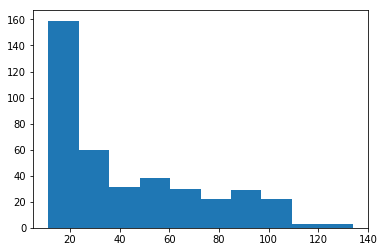

Distribution of Europe Brent Spot Price FOB (Dollars per Barrel)


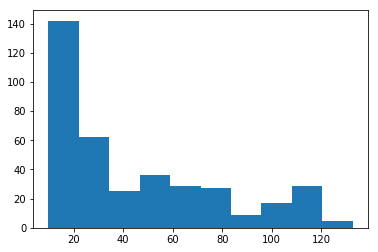

Distribution of Cushing, OK WTI Monthly Change


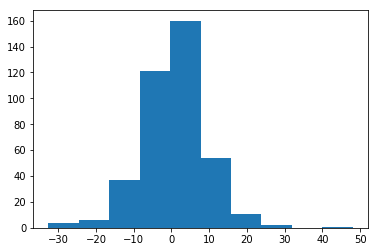

Distribution of Europe Brent Monthly Change


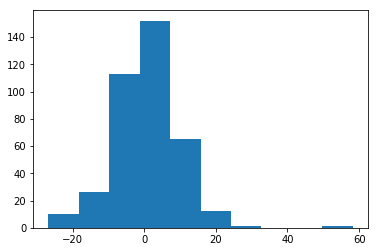

In [29]:
getDistribution(df_crudeOil)

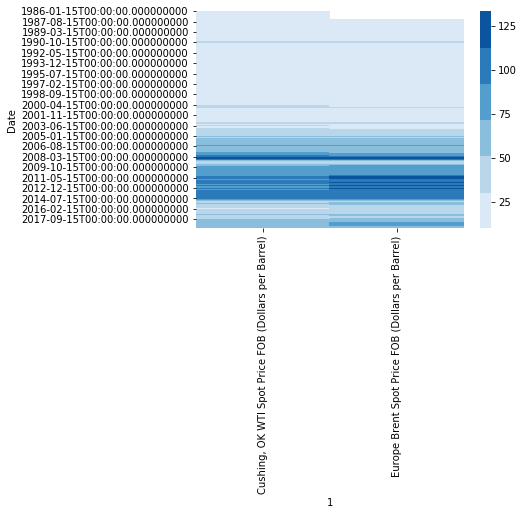

In [30]:
cmap = sns.color_palette("Blues")
sns.heatmap(df_crudeOil.iloc[:,:2],cmap=cmap)

Conventional Gasoline

In [31]:

trace0 = go.Scatter(
    x = df_cGasoline.index,
    y = df_cGasoline['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'],
    name = 'New York Harbor',
    line = dict(
        color = ('green'),
        width = 2)
)
trace1 = go.Scatter(
    x = df_cGasoline.index,
    y = df_cGasoline['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'],
    name = 'U.S. Gulf Coast',
    line = dict(
        color = ('orange'),
        width = 2,)
)


data = [trace0, trace1]

layout = dict(title = 'Conventional Gasoline Analysis',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Gallon'),
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig, filename='styled-line')

In [32]:
df_cGasoline.describe()

1      New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
count                                         392.000000                                   
mean                                            1.267541                                   
std                                             0.829709                                   
min                                             0.307000                                   
25%                                             0.556750                                   
50%                                             0.886500                                   
75%                                             1.919250                                   
max                                             3.292000                                   

1      U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
count                                         392.000000                                   
mean                                            1.238556                                   
std                                             0.813193                                   
min                                             0.294000                                   
25%                                             0.548750                                   
50%                                             0.863500                                   
75%                                             1.866000                                   
max                                             3.284000                                   

1      New York Harbor Conventional Gasoline Monthly Change  \
count                                         391.000000      
mean                                            0.793295      
std                                             9.777725      
min                                           -33.177083      
25%                                            -4.872642      
50%                                             0.770342      
75%                                             6.620545      
max                                            37.366003      

1      U.S. Gulf Coast Conventional Gasoline Monthly Change  
count                                         391.000000     
mean                                            0.858009     
std                                            10.480756     
min                                           -43.084767     
25%                                            -5.501255     
50%                                             1.016949     
75%                                             6.704321     
max                                            43.853821

In [33]:
getImportantMonths(df_cGasoline)

['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
 'min: 0.307 in 1998-12-15 00:00:00',
 'max: 3.292 in 2008-06-15 00:00:00',
 'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
 'min: 0.294 in 1998-12-15 00:00:00',
 'max: 3.284 in 2008-06-15 00:00:00',
 'New York Harbor Conventional Gasoline Monthly Change',
 'min: -33.177083333333336 in 2008-11-15 00:00:00',
 'max: 37.36600306278712 in 1990-08-15 00:00:00',
 'U.S. Gulf Coast Conventional Gasoline Monthly Change',
 'min: -43.08476736775015 in 2008-10-15 00:00:00',
 'max: 43.85382059800664 in 1990-08-15 00:00:00']

Distribution of New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)


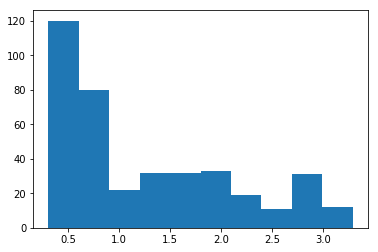

Distribution of U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)


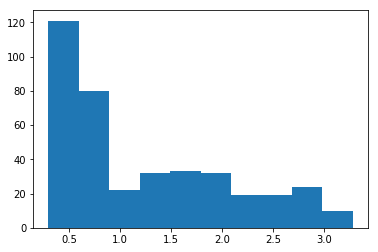

Distribution of New York Harbor Conventional Gasoline Monthly Change


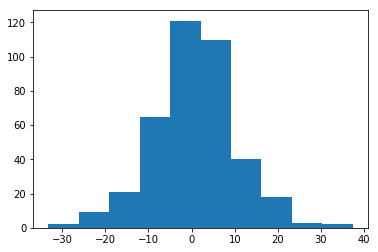

Distribution of U.S. Gulf Coast Conventional Gasoline Monthly Change


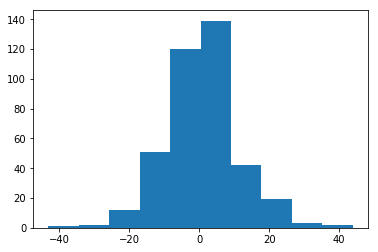

In [34]:
getDistribution(df_cGasoline)

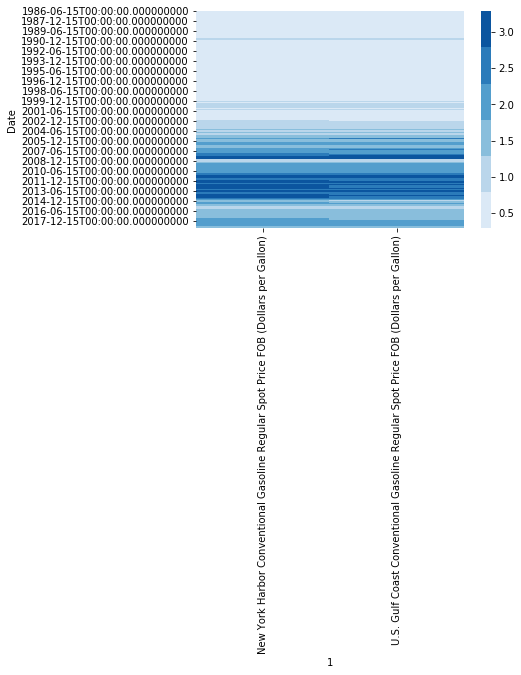

In [35]:
cmap = sns.color_palette("Blues")
sns.heatmap(df_cGasoline.iloc[:,:2],cmap=cmap)

Regular Gasoline

In [36]:

trace0 = go.Scatter(
    x = df_rGasoline.index,
    y = df_rGasoline['Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'],
    name = 'New York Harbor',
    line = dict(
        color = ('green'),
        width = 2)
)

data = [trace0]

layout = dict(title = 'Regular Gasoline Analysis',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Gallon'),
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig, filename='styled-line')

In [37]:
df_rGasoline.describe()

1      Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)  \
count                                         188.000000                                
mean                                            2.147021                                
std                                             0.631317                                
min                                             0.949000                                
25%                                             1.642000                                
50%                                             2.079000                                
75%                                             2.668500                                
max                                             3.694000                                

1      Los Angeles Reformulated RBOB Regular Gasoline Monthly Change  
count                                         187.000000              
mean                                            0.962776              
std                                            12.348753              
min                                           -40.329412              
25%                                            -6.344894              
50%                                             1.097017              
75%                                             7.790218              
max                                            57.525773

In [38]:
getImportantMonths(df_rGasoline)

['Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)',
 'min: 0.949 in 2003-09-15 00:00:00',
 'max: 3.694 in 2008-06-15 00:00:00',
 'Los Angeles Reformulated RBOB Regular Gasoline Monthly Change',
 'min: -40.32941176470588 in 2008-11-15 00:00:00',
 'max: 57.525773195876305 in 2016-03-15 00:00:00']

Distribution of Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)


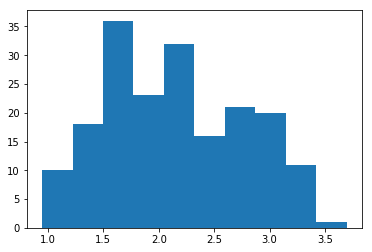

Distribution of Los Angeles Reformulated RBOB Regular Gasoline Monthly Change


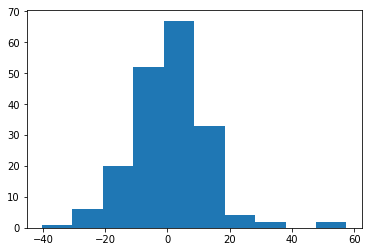

In [39]:
getDistribution(df_rGasoline)

Heat Oil Analyses

In [40]:
#Heat Oil
trace0 = go.Scatter(
    x = df_heatOil.index,
    y = df_heatOil['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)'],
    name = 'New York Harbor',
    line = dict(
        color = ('green'),
        width = 2)
)

data = [trace0]

layout = dict(title = 'Heat Oil Analysis',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Gallon'),
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig, filename='styled-line')

In [41]:
df_heatOil.describe()

1      New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)  \
count                                         392.000000                       
mean                                            1.278319                       
std                                             0.885156                       
min                                             0.304000                       
25%                                             0.539750                       
50%                                             0.840000                       
75%                                             1.867000                       
max                                             3.801000                       

1      New York Harbor No. 2 Heating Oil Monthly Change  
count                                        391.000000  
mean                                           0.761170  
std                                            8.591302  
min                                          -23.928378  
25%                                           -4.399083  
50%                                            0.806452  
75%                                            5.610438  
max                                           41.807910

In [42]:
getImportantMonths(df_heatOil)

['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)',
 'min: 0.304 in 1999-02-15 00:00:00',
 'max: 3.801 in 2008-06-15 00:00:00',
 'New York Harbor No. 2 Heating Oil Monthly Change',
 'min: -23.928377645143794 in 2008-12-15 00:00:00',
 'max: 41.807909604519764 in 1990-08-15 00:00:00']

Distribution of New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)


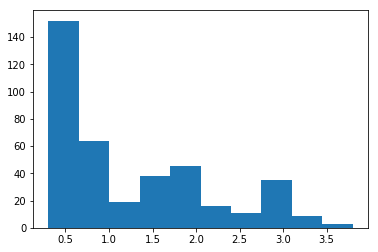

Distribution of New York Harbor No. 2 Heating Oil Monthly Change


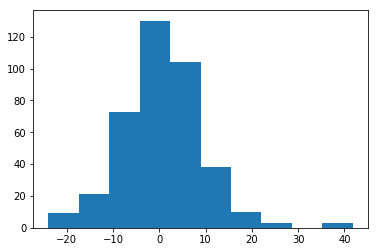

In [43]:
getDistribution(df_heatOil)

Diesel Oil Price Analysis

In [44]:
#Diesel Oil
trace0 = go.Scatter(
    x = df_diesel.index,
    y = df_diesel['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'],
    name = 'New York Harbor',
    line = dict(
        color = ('rgb(228,26,28)'),
        width = 2)
)
trace1 = go.Scatter(
    x = df_diesel.index,
    y = df_diesel['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'],
    name = 'U.S. Gulf Coast',
    line = dict(
        color = ('rgb(55,126,184)'),
        width = 2,)
)
trace2 = go.Scatter(
    x = df_diesel.index,
    y = df_diesel['Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)'],
    name = 'Los Angeles, CA',
    line = dict(
        color = ('rgb(77,175,74)'),
        width = 2,)
)


data = [trace0, trace1,trace2]

layout = dict(title = 'Diesel Oil Analysis',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Gallon'),
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig, filename='styled-line')

In [45]:
df_diesel.describe()

1      New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
count                                         152.000000                              
mean                                            2.291855                              
std                                             0.672420                              
min                                             0.979000                              
25%                                             1.794750                              
50%                                             2.138000                              
75%                                             2.959000                              
max                                             3.887000                              

1      U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
count                                         152.000000                              
mean                                            2.244559                              
std                                             0.667094                              
min                                             0.958000                              
25%                                             1.768750                              
50%                                             2.105000                              
75%                                             2.914000                              
max                                             3.851000                              

1      Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)  \
count                                         274.000000                              
mean                                            1.711139                              
std                                             0.882817                              
min                                             0.391000                              
25%                                             0.872250                              
50%                                             1.663000                              
75%                                             2.285500                              
max                                             3.894000                              

1      New York Harbor Monthly Change  U.S. Gulf Coast Monthly Change  \
count                      151.000000                      151.000000   
mean                         0.229860                        0.217588   
std                          7.785065                        7.990918   
min                        -25.325013                      -25.556158   
25%                         -3.889112                       -4.113479   
50%                          0.885559                        0.728700   
75%                          4.884422                        5.415227   
max                         19.736842                       21.020819   

1      Los Angeles, CA Monthly Change  
count                      273.000000  
mean                         0.687299  
std                          9.590957  
min                        -25.016790  
25%                         -5.023022  
50%                          1.267281  
75%                          6.220984  
max                         53.708440

In [46]:
getImportantMonths(df_diesel)

['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
 'min: 0.979 in 2016-01-15 00:00:00',
 'max: 3.887 in 2008-06-15 00:00:00',
 'U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
 'min: 0.958 in 2016-01-15 00:00:00',
 'max: 3.851 in 2008-06-15 00:00:00',
 'Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)',
 'min: 0.391 in 1998-12-15 00:00:00',
 'max: 3.894 in 2008-06-15 00:00:00',
 'New York Harbor Monthly Change',
 'min: -25.325013000520023 in 2008-12-15 00:00:00',
 'max: 19.736842105263165 in 2009-06-15 00:00:00',
 'U.S. Gulf Coast Monthly Change',
 'min: -25.556158437330435 in 2008-12-15 00:00:00',
 'max: 21.020819341840145 in 2009-06-15 00:00:00',
 'Los Angeles, CA Monthly Change',
 'min: -25.01678979180658 in 2008-10-15 00:00:00',
 'max: 53.7084398976982 in 1999-03-15 00:00:00']

Distribution of New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)


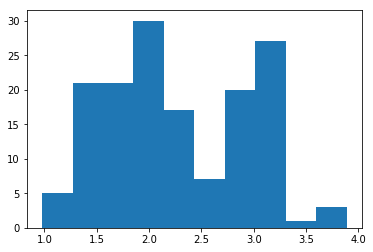

Distribution of U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)


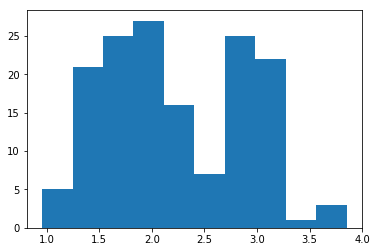

Distribution of Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)


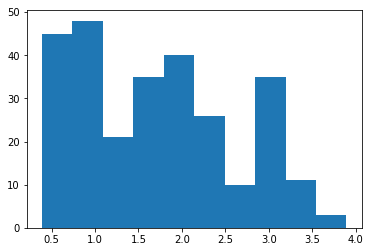

Distribution of New York Harbor Monthly Change


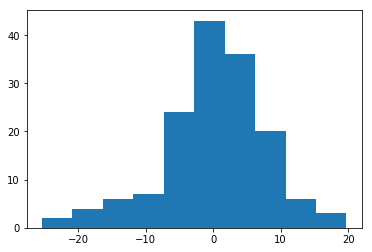

Distribution of U.S. Gulf Coast Monthly Change


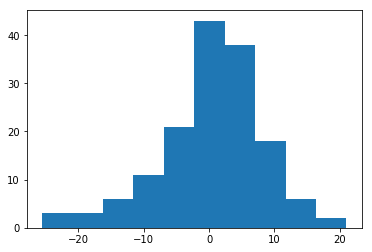

Distribution of Los Angeles, CA Monthly Change


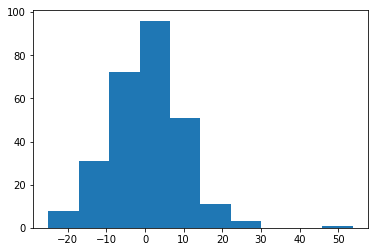

In [47]:
getDistribution(df_diesel)

Jet Fuel Analysis

In [48]:
#Jet Fuel
trace0 = go.Scatter(
    x = df_jet.index,
    y = df_jet['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)'],
    name = 'U.S. Gulf Coast',
    line = dict(
        color = ('green'),
        width = 2)
)

data = [trace0]

layout = dict(title = 'Jet Fuel Analysis',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Gallon'),
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig, filename='styled-line')

In [49]:
df_jet.describe()

1      U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)  \
count                                         346.000000                            
mean                                            1.396757                            
std                                             0.911256                            
min                                             0.304000                            
25%                                             0.565000                            
50%                                             1.087000                            
75%                                             2.050000                            
max                                             3.886000                            

1      U.S. Gulf Coast Monthly Change  
count                      345.000000  
mean                         0.740796  
std                          8.852279  
min                        -31.407407  
25%                         -4.032258  
50%                          0.904159  
75%                          6.088005  
max                         47.850467

In [50]:
getImportantMonths(df_jet)

['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)',
 'min: 0.304 in 1998-12-15 00:00:00',
 'max: 3.886 in 2008-07-15 00:00:00',
 'U.S. Gulf Coast Monthly Change',
 'min: -31.407407407407405 in 2008-10-15 00:00:00',
 'max: 47.850467289719624 in 1990-08-15 00:00:00']

Distribution of U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)


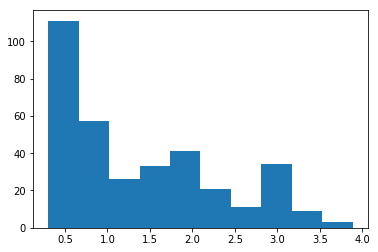

Distribution of U.S. Gulf Coast Monthly Change


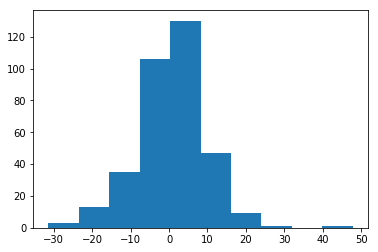

In [51]:
getDistribution(df_jet)

Propane Analysis

In [52]:
#Propane
trace0 = go.Scatter(
    x = df_prop.index,
    y = df_prop['Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)'],
    name = 'Mont Belvieu, TX',
    line = dict(
        color = ('green'),
        width = 2)
)

data = [trace0]

layout = dict(title = 'Propane Analysis',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Gallon'),
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig, filename='styled-line')

In [53]:
df_prop.describe()

1      Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)  \
count                                         320.000000              
mean                                            0.712997              
std                                             0.379146              
min                                             0.209000              
25%                                             0.372000              
50%                                             0.612500              
75%                                             0.968000              
max                                             1.862000              

1      Mont Belvieu, TX Propane Monthly Change  
count                               319.000000  
mean                                  0.689603  
std                                   9.731611  
min                                 -31.699346  
25%                                  -4.995965  
50%                                   0.619469  
75%                                   6.407099  
max                                  29.672897

In [54]:
getImportantMonths(df_prop)

['Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)',
 'min: 0.209 in 1998-12-15 00:00:00',
 'max: 1.862 in 2008-07-15 00:00:00',
 'Mont Belvieu, TX Propane Monthly Change',
 'min: -31.699346405228766 in 2008-10-15 00:00:00',
 'max: 29.672897196261694 in 2000-01-15 00:00:00']

Distribution of Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)


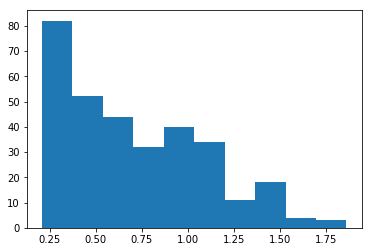

Distribution of Mont Belvieu, TX Propane Monthly Change


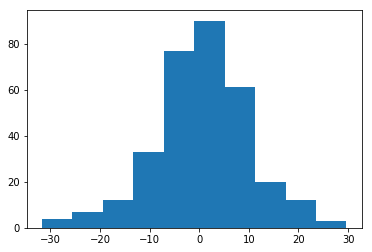

In [55]:
getDistribution(df_prop)

# Let's club all the datasets to get a view of the price of all of them combinedly

Transforming the unit Barrel to Gallon price of Crude Oil dataset to make proper comparison between the other datasets

In [56]:
df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Gallon)']=df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].apply(lambda x: x/31.5)
df_crudeOil['Europe Brent Spot Price FOB (Dollars per Gallon)']=df_crudeOil['Europe Brent Spot Price FOB (Dollars per Barrel)'].apply(lambda x: x/31.5)
df_crudeOil

1           Cushing, OK WTI Spot Price FOB (Dollars per Barrel)  \
Date                                                              
1986-01-15                                              22.93     
1986-02-15                                              15.46     
1986-03-15                                              12.61     
1986-04-15                                              12.84     
1986-05-15                                              15.38     
1986-06-15                                              13.43     
1986-07-15                                              11.59     
1986-08-15                                              15.10     
1986-09-15                                              14.87     
1986-10-15                                              14.90     
1986-11-15                                              15.22     
1986-12-15                                              16.11     
1987-01-15                                              18.65     
1987-02-15                                              17.75     
1987-03-15                                              18.30     
1987-04-15                                              18.68     
1987-05-15                                              19.44     
1987-06-15                                              20.07     
1987-07-15                                              21.34     
1987-08-15                                              20.31     
1987-09-15                                              19.53     
1987-10-15                                              19.86     
1987-11-15                                              18.85     
1987-12-15                                              17.28     
1988-01-15                                              17.13     
1988-02-15                                              16.80     
1988-03-15                                              16.20     
1988-04-15                                              17.86     
1988-05-15                                              17.42     
1988-06-15                                              16.53     
...                                                       ...     
2016-08-15                                              44.72     
2016-09-15                                              45.18     
2016-10-15                                              49.78     
2016-11-15                                              45.66     
2016-12-15                                              51.97     
2017-01-15                                              52.50     
2017-02-15                                              53.47     
2017-03-15                                              49.33     
2017-04-15                                              51.06     
2017-05-15                                              48.48     
2017-06-15                                              45.18     
2017-07-15                                              46.63     
2017-08-15                                              48.04     
2017-09-15                                              49.82     
2017-10-15                                              51.58     
2017-11-15                                              56.64     
2017-12-15                                              57.88     
2018-01-15                                              63.70     
2018-02-15                                              62.23     
2018-03-15                                              62.73     
2018-04-15                                              66.25     
2018-05-15                                              69.98     
2018-06-15                                              67.87     
2018-07-15                                              70.98     
2018-08-15                                              68.06     
2018-09-15                                              70.23     
2018-10-15                                     

Visualizing all time series data together

In [57]:
trace0 = go.Scatter(
    x = df_crudeOil.index,
    y = df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Gallon)'],
    name = 'Cushing, OK WTI-Crude Oil',
    line = dict(
        color = ('rgb(166,206,227)'),
        width = 2)
)
trace1 = go.Scatter(
    x = df_crudeOil.index,
    y = df_crudeOil['Europe Brent Spot Price FOB (Dollars per Gallon)'],
    name = 'Europe Brent-Crude Oil',
    line = dict(
        color = ('rgb(31,120,180)'),
        width = 2,)
)
trace2 = go.Scatter(
    x = df_cGasoline.index,
    y = df_cGasoline['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'],
    name = 'New York Harbor-Conventional Gasoline',
    line = dict(
        color = ('rgb(178,223,138)'),
        width = 2)
)
trace3 = go.Scatter(
    x = df_cGasoline.index,
    y = df_cGasoline['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'],
    name = 'U.S. Gulf Coast-Conventional Gasoline',
    line = dict(
        color = ('rgb(51,160,44)'),
        width = 2,)
)
trace4 = go.Scatter(
    x = df_rGasoline.index,
    y = df_rGasoline['Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'],
    name = 'Los Angeles-RBOB Regular Gasoline',
    line = dict(
        color = ('rgb(255,255,153)'),
        width = 2,)
)
trace5 = go.Scatter(
    x = df_heatOil.index,
    y = df_heatOil['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)'],
    name = 'New York Harbor-Heating Oil',
    line = dict(
        color = ('rgb(177,89,40)'),
        width = 2,)
)
trace6 = go.Scatter(
    x = df_diesel.index,
    y = df_diesel['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'],
    name = 'New York Harbor-Diesel',
    line = dict(
        color = ('rgb(253,191,111)'),
        width = 2,)
)
trace7 = go.Scatter(
    x = df_diesel.index,
    y = df_diesel['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'],
    name = 'U.S. Gulf Coast-Diesel',
    line = dict(
        color = ('rgb(255,127,0)'),
        width = 2,)
)
trace8 = go.Scatter(
    x = df_diesel.index,
    y = df_diesel['Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)'],
    name = 'Los Angeles, CA-Diesel',
    line = dict(
        color = ('rgb(227,26,28)'),
        width = 2,)
)
trace9 = go.Scatter(
    x = df_jet.index,
    y = df_jet['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)'],
    name = 'U.S. Gulf Coast-Jet Fuel',
    line = dict(
        color = ('rgb(251,154,153)'),
        width = 2,)
)
trace10 = go.Scatter(
    x = df_prop.index,
    y = df_prop['Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)'],
    name = 'Mont Belvieu, TX-Propane',
    line = dict(
        color = ('rgb(106,61,154)'),
        width = 2,)
)



data = [trace0, trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10]

layout = dict(title = 'Analysis of All Pretroleum fuels',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Gallon'),
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig, filename='styled-line')

Creating heatmap to see the price distribution of products across the years

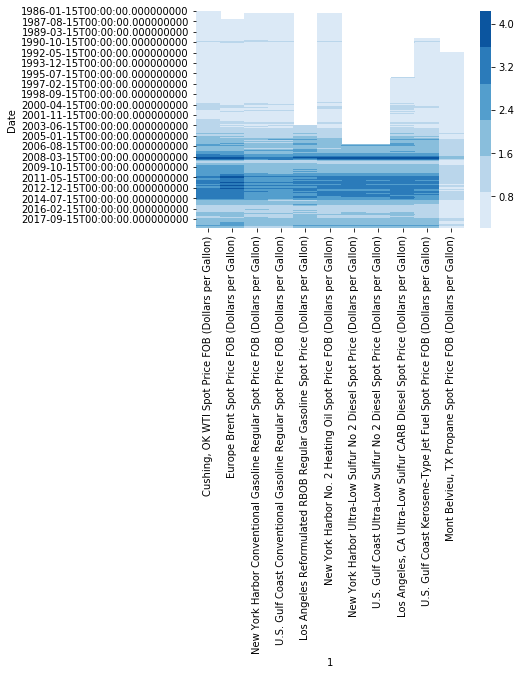

In [58]:
combined_data = pd.concat([df_crudeOil.iloc[:,4:], df_cGasoline.iloc[:,:2],df_rGasoline.iloc[:,:1],df_heatOil
.iloc[:,:1],df_diesel.iloc[:,:3],df_jet.iloc[:,:1],df_prop.iloc[:,:1]], axis=1, sort=False)
cmap = sns.color_palette("Blues")
sns.heatmap(combined_data,cmap=cmap)

Plotting the coorelation plot to see relation between all the variables

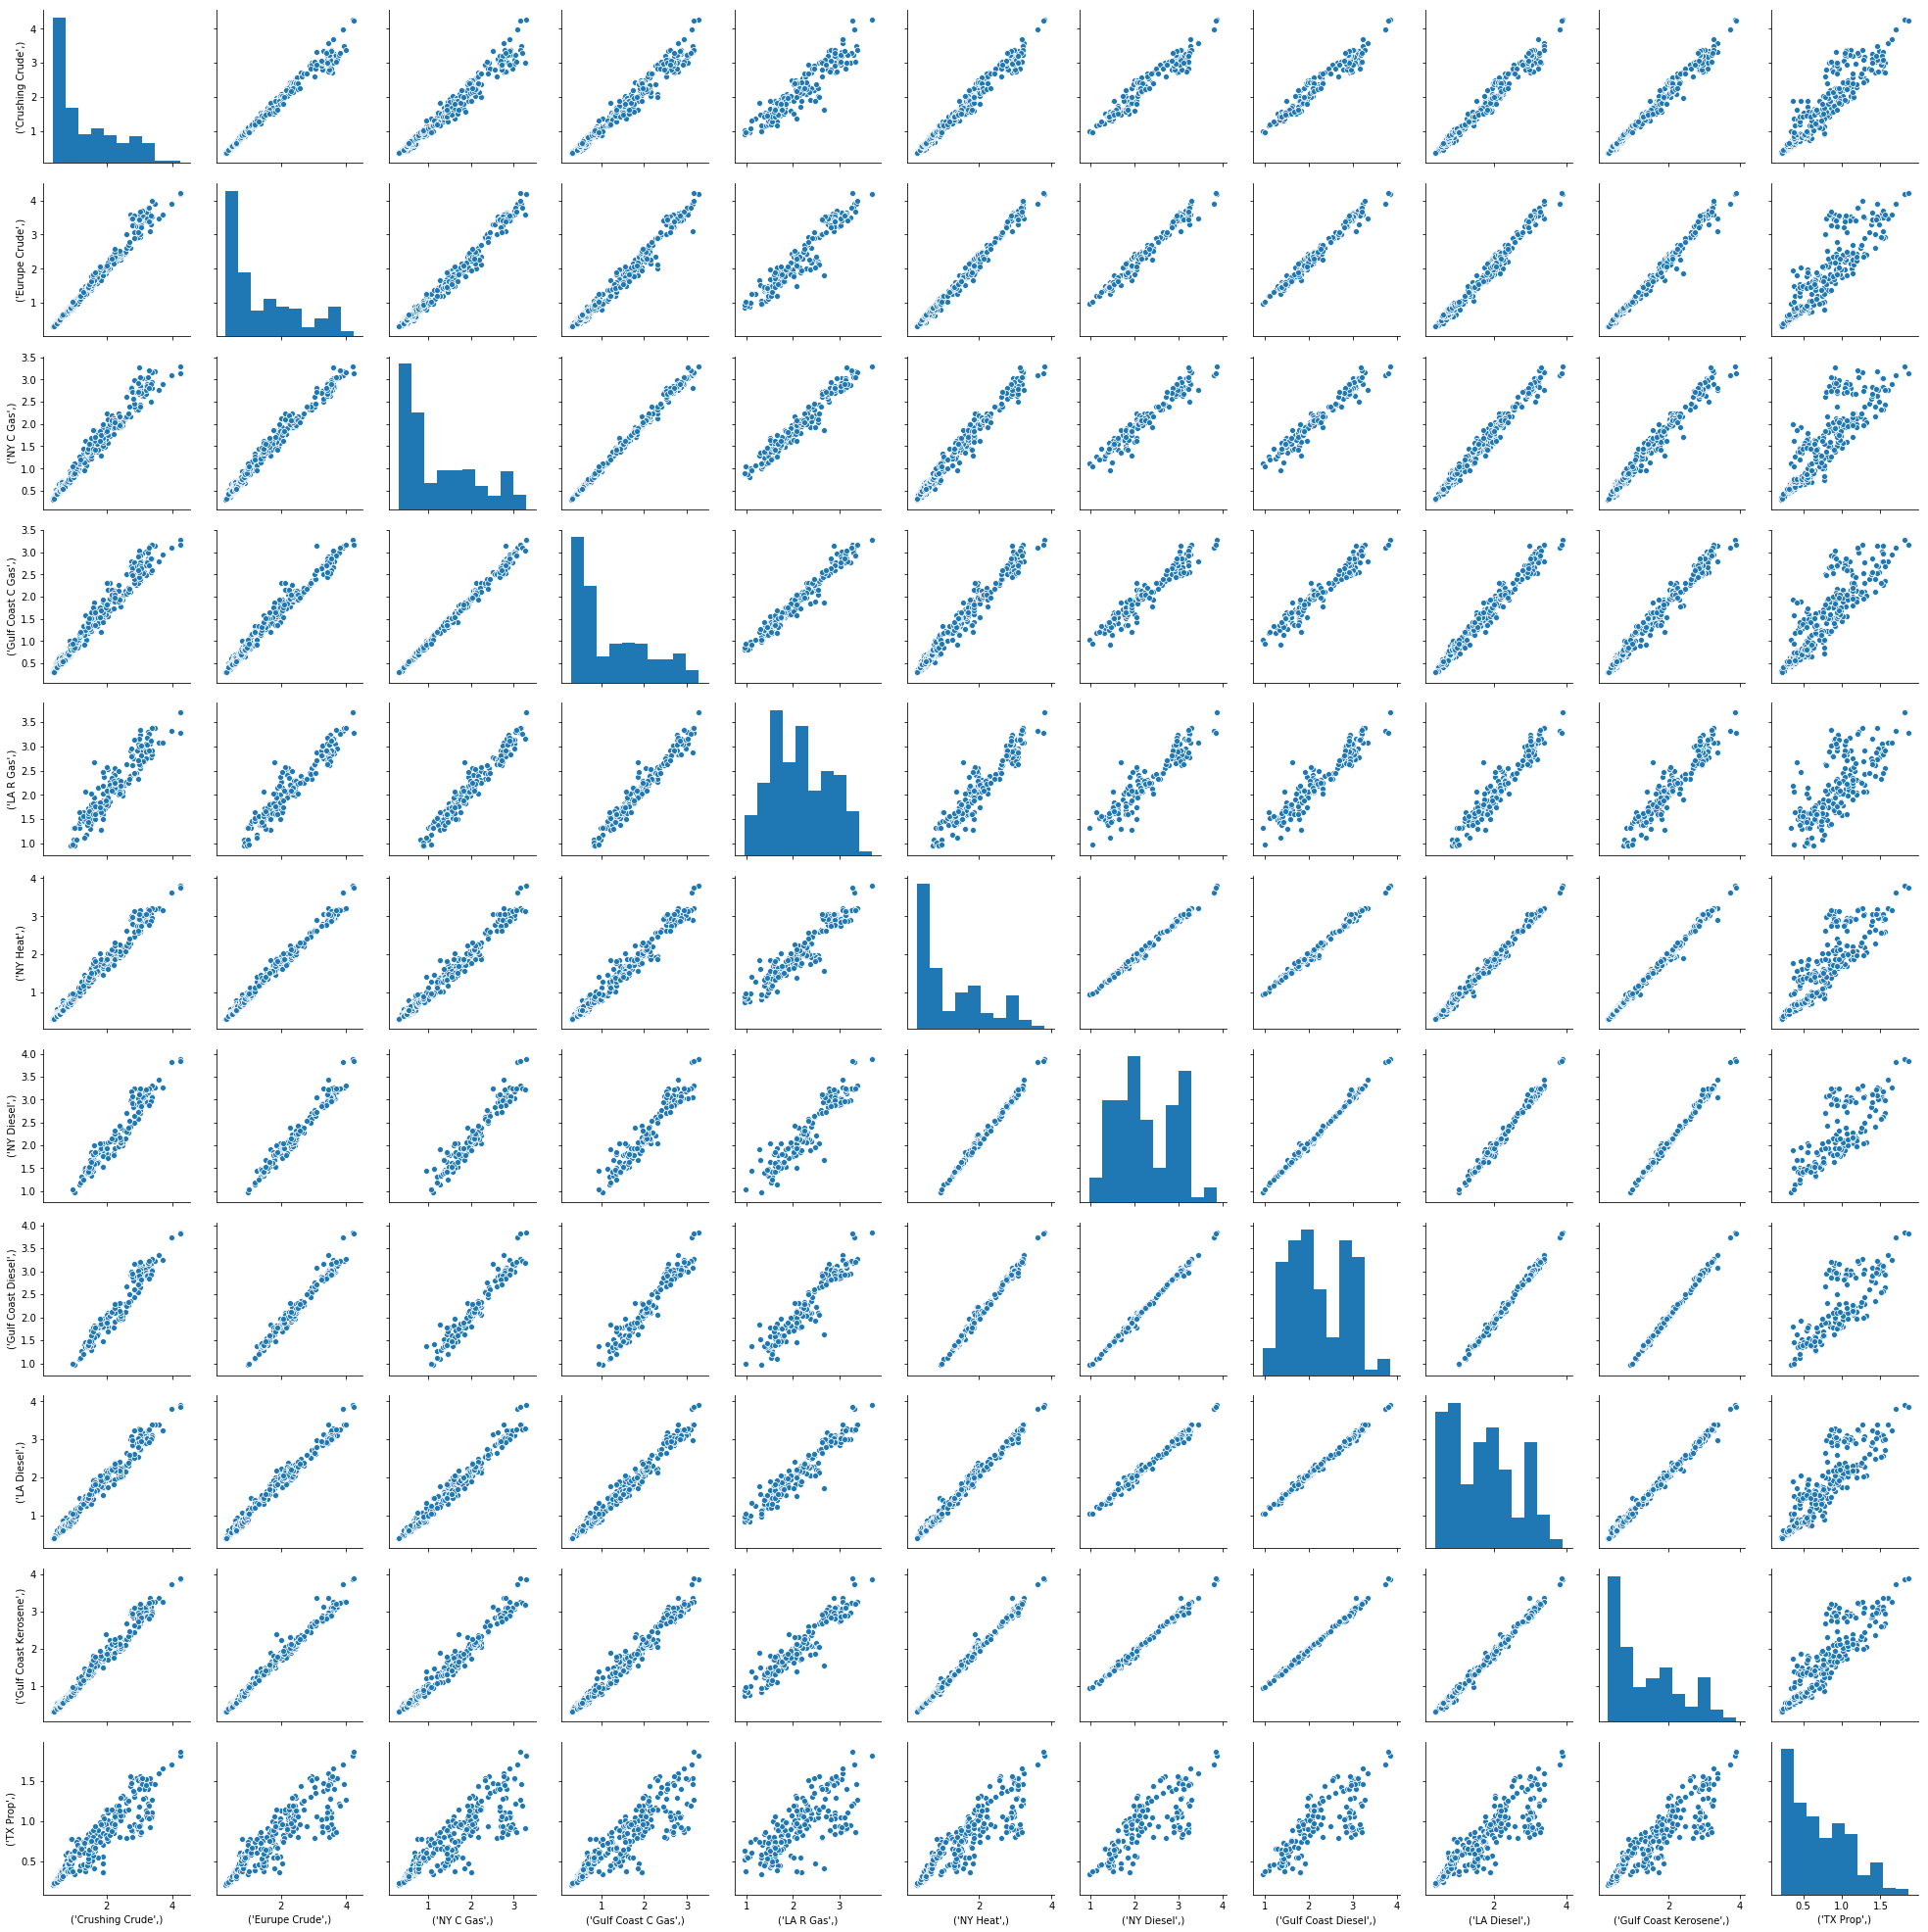

In [59]:
combined_data.columns=[['Crushing Crude','Eurupe Crude','NY C Gas','Gulf Coast C Gas','LA R Gas','NY Heat','NY Diesel','Gulf Coast Diesel','LA Diesel','Gulf Coast Kerosene','TX Prop']]
g = sns.pairplot(combined_data)

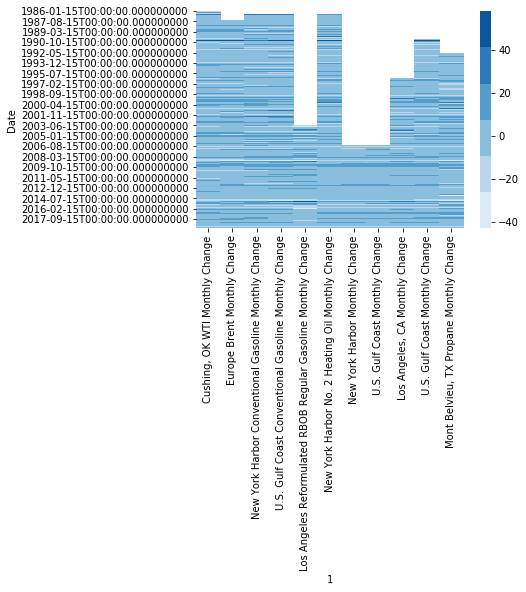

In [60]:
#Montly Change HeatMap
combined_data_monthly_change = pd.concat([df_crudeOil.iloc[:,2:4], df_cGasoline.iloc[:,2:],df_rGasoline.iloc[:,1:],df_heatOil
.iloc[:,1:],df_diesel.iloc[:,3:],df_jet.iloc[:,1:],df_prop.iloc[:,1:]], axis=1, sort=False)
cmap = sns.color_palette("Blues")
sns.heatmap(combined_data_monthly_change,cmap=cmap)


# Identification the correlation between Conventional Gasoline prices between New York Harbor and U.S. Gulf Coast

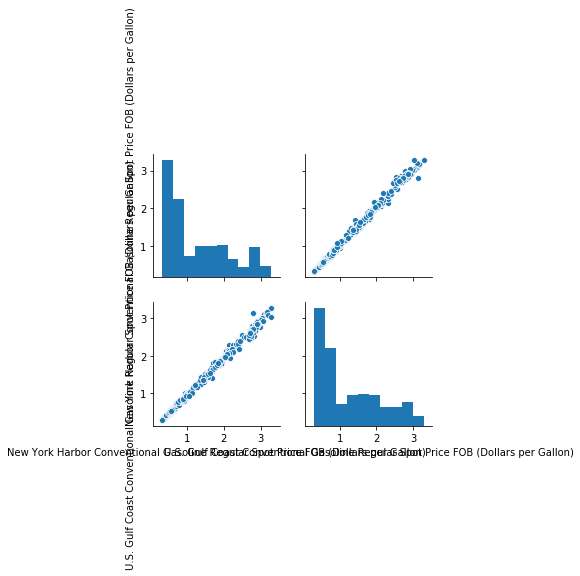

In [61]:
g = sns.pairplot(df_cGasoline.iloc[:,:2])

In [62]:
np.corrcoef(df_cGasoline.iloc[:,0],df_cGasoline.iloc[:,1])

array([[1.        , 0.99802942],
       [0.99802942, 1.        ]])

We can see strong positive coorelation between both the cities' prices for conventional Gasoline

# Finding out a timeframe where prices of all Products were lower than prior data points

In [63]:
def checkIfLowerThanPrior(prior,current):
    to_check=current-prior
    if ((to_check <0).sum() == to_check.size).astype(np.int)==1:
        return True
    else:
        return False

Plot to represent the times when all Products prices were lower than their prior data


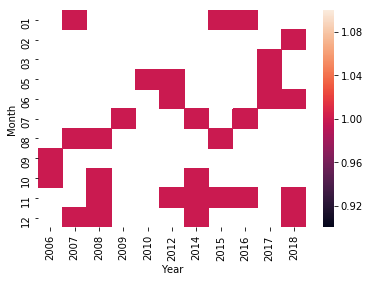

In [64]:
#Checking for monthly data
timeframe=[]
for row in range(0,len(combined_data)):
    if np.isnan(np.array(combined_data.iloc[row-1,:])).any() or np.isnan(np.array(combined_data.iloc[row,:])).any():
        continue
    else:
        if checkIfLowerThanPrior(np.array(combined_data.iloc[row-1,:]),np.array(combined_data.iloc[row,:])):
            timeframe.append(combined_data.index[row])
#Plot to represent the findings
print("Plot to represent the times when all Products prices were lower than their prior data")
X = pd.Series(timeframe).apply(lambda x: str(x).split('-')[1])
Y = pd.Series(timeframe).apply(lambda x: str(x).split('-')[0])
Z = np.ones(len(X))
plot_data = pd.DataFrame({'Month': X, 'Year': Y, 'True/False': Z})
data_pivoted = plot_data.pivot("Month", "Year", "True/False")
ax = sns.heatmap(data_pivoted)

plt.show()

# Prediction the crude oil price for next 6 months

Predicting prices for Cushing, OK WTI Spot Price FOB in Barrels

In [65]:
#Check for stationarity of the time series
from statsmodels.tsa.stattools import adfuller
X = df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.743708
p-value: 0.408745


As p-value > 0.05, we can say that the series is non stationary
Lets take log of the Series and check if that is make it stationary

In [66]:
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.964412
p-value: 0.302392


Again, our hull hypotheisis will be rejected in this case. The series stays to be non-stationary.

Let's check the Trend, seasonality and residual of the time series

As the series is non-stationary, we can apply S-ARIMA model for forecasting the prices of the of Crude Oil at Cushing

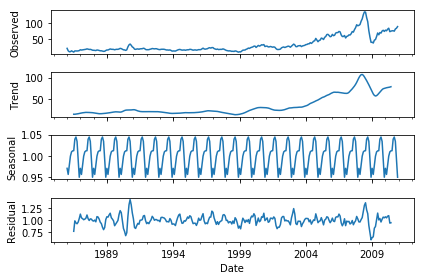

In [67]:
#Divide information into training and testing data
y = df_crudeOil[:'2010'].resample('MS').mean()
df_train=y[:'2010']
df_test=y['2010':]
#Decompose to see the trend and seasonality
decomposition = sm.tsa.seasonal_decompose(df_train['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], model='multiplicative')
fig = decomposition.plot()
plt.show()


Trend and observed graph show similar trend, it will be a multiplicative model.

Here, we try to get the best possible values p,q, r for our seasonal ARIMA model (that is which has the least AIC value)

In [68]:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
min_val=9999999
comment=""
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(df_train[['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']],
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        if(int(results.aic)<min_val):
            min_val=int(results.aic)
            comment=('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
print(str("Minimum AIC value is obtained when: ")+comment)
            
        

Minimum AIC value is obtained when: ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1502.443817496256


Using the min AIC value found combinations of p,q,r for training S-ARIMA model

In [69]:
mod = sm.tsa.statespace.SARIMAX(df_train[['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5930      0.063      9.476      0.000       0.470       0.716
ma.L1         -0.1982      0.093     -2.133      0.033      -0.380      -0.016
ma.S.L12      -0.9565      0.059    -16.315      0.000      -1.071      -0.842
sigma2        12.9744      0.778     16.671      0.000      11.449      14.500


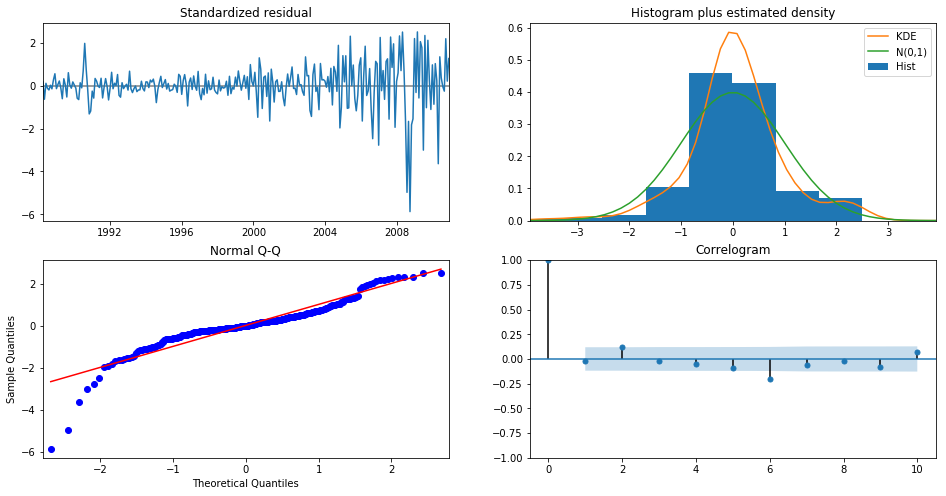

In [70]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

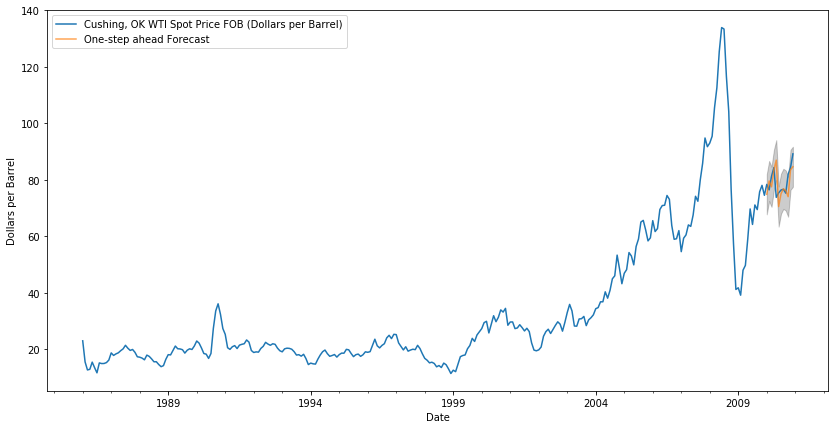

Root mean squered error: 5.168870748570945


In [71]:
pred = results.get_prediction(start=pd.to_datetime('2010-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y[['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']].plot(label='Cushing, OK WTI Spot Price FOB (Dollars per Barrel)')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Dollars per Barrel')
plt.legend()
plt.show()

rms = sqrt(mean_squared_error(df_test[['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']], pred.predicted_mean))
print("Root mean squered error: "+str(rms))

The visualization shows that the predictation was a correctede made. Therefore, we move ahead for training the model now with the complete dataset.

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4611      0.078      5.940      0.000       0.309       0.613
ma.L1         -0.1083      0.102     -1.061      0.288      -0.308       0.092
ma.S.L12      -1.0000    166.972     -0.006      0.995    -328.259     326.259
sigma2        16.1854   2702.814      0.006      0.995   -5281.232    5313.603


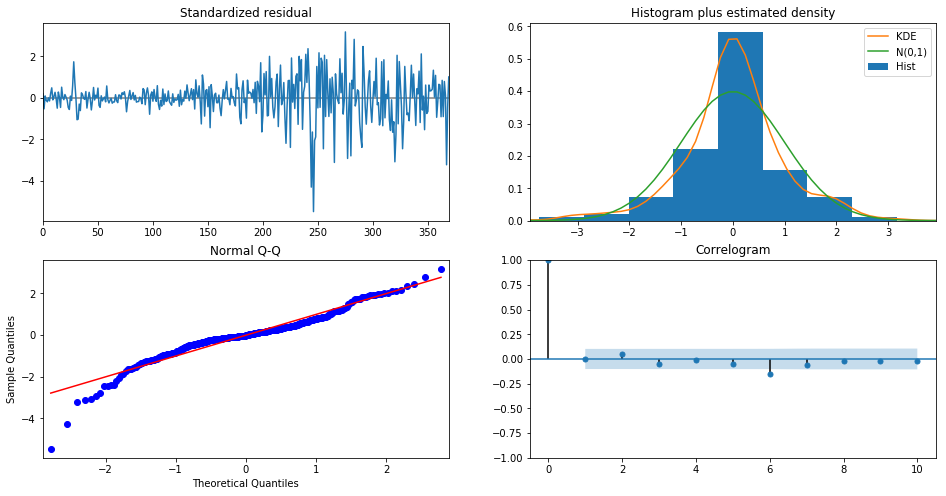

In [72]:
mod = sm.tsa.statespace.SARIMAX(df_crudeOil[['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Again, everything seems good.

In [73]:
#Predict for next 6 months
pred = results.forecast(6)

pred=pd.DataFrame(pred)
date_list=['2019-02-15','2019-03-15','2019-04-15','2019-05-15','2019-06-15','2019-07-15']
pred.index=pd.to_datetime(date_list)

trace0 = go.Scatter(
    x = df_crudeOil.index,
    y = df_crudeOil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'],
    name = 'Cushing, OK WTI-Crude Oil',
    line = dict(
        color = ('rgb(166,206,227)'),
        width = 2)
)
trace1 = go.Scatter(
    x = pred.index,
    y = pred[0],
    name = 'Forecasted',
    line = dict(
        color = ('blue'),
        width = 2)
)
data = [trace0,trace1]

layout = dict(title = 'Crude Oil - Cushing, OK WTI Spot Price FOB Forecast for next 6 months',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Barrel'),
              )

fig = dict(data=data, layout=layout)
offline.iplot(fig, filename='styled-line')

The forcasts seems to be aligned with it previous value

Predicting Price for Crude at Europe Bent in Barrels

In [74]:

#X=pd.DataFrame(df_crudeOil['Europe Brent Spot Price FOB (Dollars per Barrel)'])
X=[x for x in df_crudeOil['Europe Brent Spot Price FOB (Dollars per Barrel)'] if np.isnan(x)!=True]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.025794
p-value: 0.275379


Series is non - stationary, p-value > 0.05

In [75]:
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.642520
p-value: 0.460944


Log values of time series, also says that it is non-stationary

Predict the prices using seasonal ARIMA

Lets start with seeing the decomposition of data

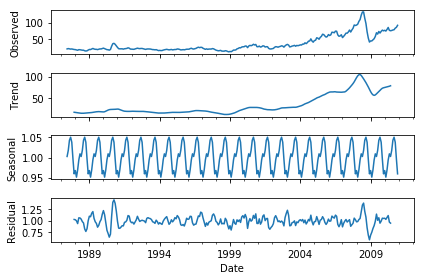

In [76]:
y = df_crudeOil[:'2010'].resample('MS').mean()
y=y.dropna()
df_train=y[:'2010']
df_test=y['2010':]
df_train
#Decompose to see the trend and seasonality
decomposition = sm.tsa.seasonal_decompose(df_train['Europe Brent Spot Price FOB (Dollars per Barrel)'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [77]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
min_val=9999999
comment=""
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(df_train[['Europe Brent Spot Price FOB (Dollars per Barrel)']],
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        if(int(results.aic)<min_val):
            min_val=int(results.aic)
            comment=('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
print(str("Minimum AIC value is obtained when: ")+comment)
            
        

Minimum AIC value is obtained when: ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1447.3098593150075


Similar to what we did before, we take the found combination and feed it to the SARIMA Model and its diagnostics

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5162      0.081      6.379      0.000       0.358       0.675
ma.L1         -0.1372      0.113     -1.210      0.226      -0.359       0.085
ma.S.L12      -1.0376      0.087    -11.900      0.000      -1.209      -0.867
sigma2        13.8474      1.661      8.339      0.000      10.593      17.102


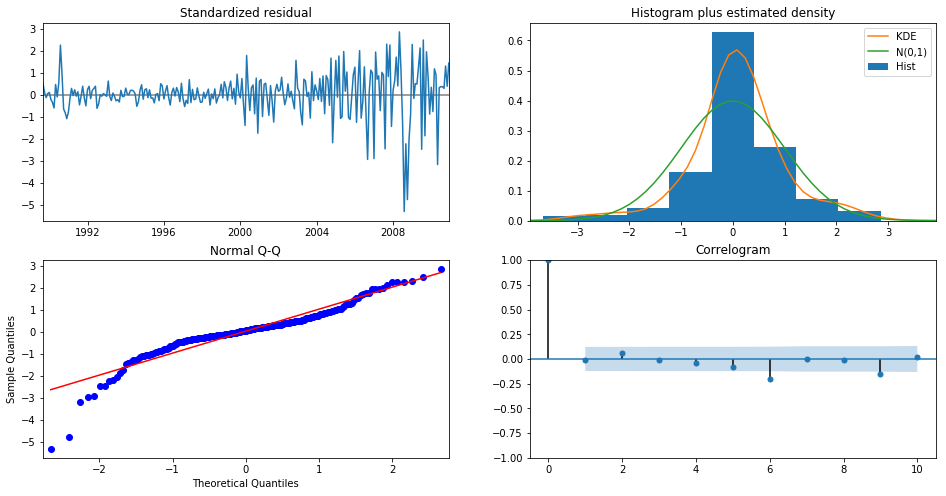

In [78]:
mod = sm.tsa.statespace.SARIMAX(df_train[['Europe Brent Spot Price FOB (Dollars per Barrel)']],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Everything seems good, so we move ahead with the visualizing the predictions

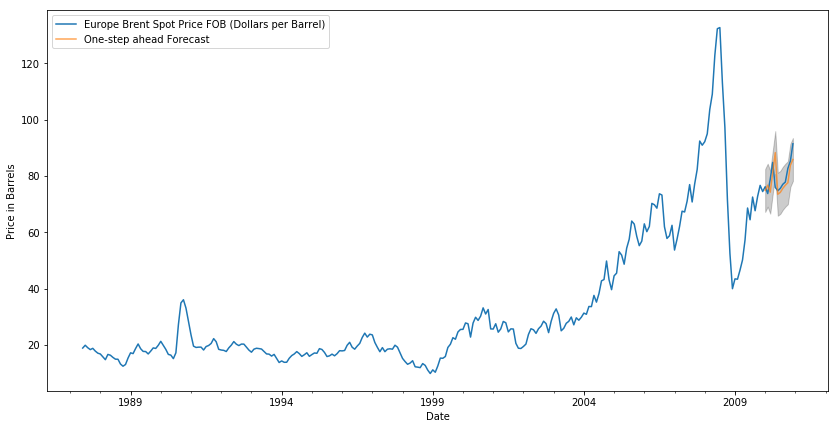

Root mean squered error: 4.681480507769938


In [79]:
pred = results.get_prediction(start=pd.to_datetime('2010-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y[['Europe Brent Spot Price FOB (Dollars per Barrel)']].plot(label='Europe Brent Spot Price FOB (Dollars per Barrel)')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price in Barrels')
plt.legend()
plt.show()

rms = sqrt(mean_squared_error(df_test[['Europe Brent Spot Price FOB (Dollars per Barrel)']], pred.predicted_mean))
print("Root mean squered error: "+str(rms))

The model could correctly get the trend and predict the results. Now, we will train the model with complete data.

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3229      0.083      3.900      0.000       0.161       0.485
ma.L1          0.0303      0.102      0.296      0.767      -0.170       0.231
ma.S.L12      -1.0000    246.049     -0.004      0.997    -483.247     481.247
sigma2        17.7862   4376.580      0.004      0.997   -8560.153    8595.726


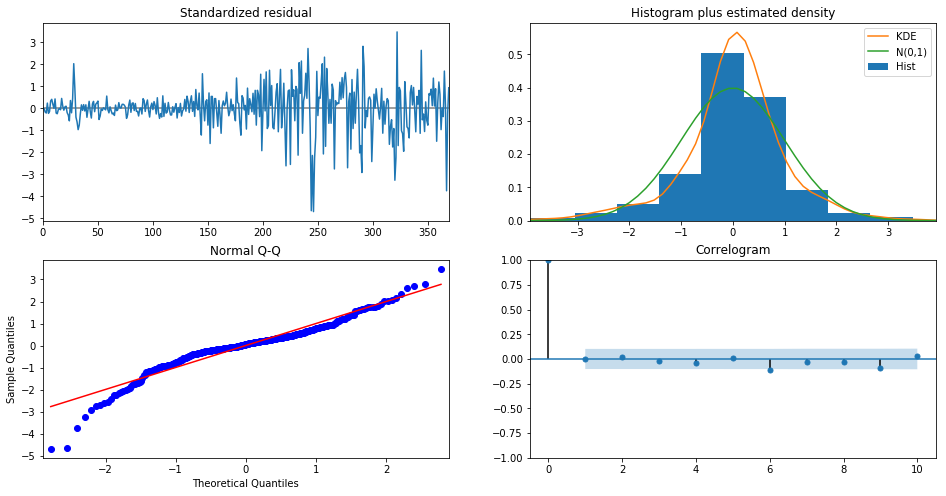

In [80]:
mod = sm.tsa.statespace.SARIMAX(df_crudeOil[['Europe Brent Spot Price FOB (Dollars per Barrel)']],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

All seems good, we therefore, visualize the forecasted data

In [81]:
#Predict for next 6 months
pred = results.forecast(6)

pred=pd.DataFrame(pred)
date_list=['2019-02-15','2019-03-15','2019-04-15','2019-05-15','2019-06-15','2019-07-15']
pred.index=pd.to_datetime(date_list)

trace0 = go.Scatter(
    x = df_crudeOil.index,
    y = df_crudeOil['Europe Brent Spot Price FOB (Dollars per Barrel)'],
    name = 'Europe Brent - Crude Oil',
    line = dict(
        color = ('rgb(166,206,227)'),
        width = 2)
)
trace1 = go.Scatter(
    x = pred.index,
    y = pred[0],
    name = 'Forecasted',
    line = dict(
        color = ('blue'),
        width = 2)
)
data = [trace0,trace1]

layout = dict(title = 'Crude Oil - Europe Brent Spot Price FOB Forecast for next 6 months',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Dollars per Barrel'),
              )

fig = dict(data=data, layout=layout)
offline.iplot(fig, filename='styled-line')